# **Hiperparametrizacion**

El modelo Random Forest ha sido seleccionado como el óptimo para este problema debido a su destacada exactitud de 77.29%, la más alta entre todos los algoritmos evaluados. Si bien presenta un coste computacional moderado-alto durante la fase de entrenamiento, este modelo compensa esta inversión inicial con una mayor precisión en las predicciones y una buena eficiencia durante la inferencia. Random Forest también ofrece ventajas adicionales como robustez frente al sobreajuste, manejo efectivo de datos con ruido y capacidad para gestionar variables tanto categóricas como numéricas sin preprocesamiento intensivo.

# **1. Preparacion de los datos**

In [3]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Cargamos los datos
data = pd.read_excel("datos.xlsx")
data.head()

,Unnamed: 0,localidad_residencia,ciclovital,sexo,niveleducativo,maltrato_sexual,conflicto_pareja,problemas_economicos,esc_educ,suicidio_amigo,poblacion_diferencial,clasificaciondelaconducta
0,0,Usme,18 – 28 Juventud,Hombre,5. Secundaria incompleta,0,0,0,0,0,Otra,Intento de Suicidio
1,1,Usme,18 – 28 Juventud,Hombre,5. Secundaria incompleta,0,0,0,0,0,Otra,Intento de Suicidio
2,2,Usme,18 – 28 Juventud,Hombre,5. Secundaria incompleta,0,0,0,0,0,Otra,Intento de Suicidio
3,3,Tunjuelito,18 – 28 Juventud,Hombre,5. Secundaria incompleta,0,0,0,0,0,Otra,Ideación suicida
4,4,Usme,18 – 28 Juventud,Mujer,8. Técnico post-secundaria completa,0,0,0,0,0,Otra,Intento de Suicidio


In [5]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279634 entries, 0 to 279633
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Unnamed: 0                 279634 non-null  int64 
 1   localidad_residencia       279634 non-null  object
 2   ciclovital                 279634 non-null  object
 3   sexo                       279634 non-null  object
 4   niveleducativo             279634 non-null  object
 5   maltrato_sexual            279634 non-null  int64 
 6   conflicto_pareja           279634 non-null  int64 
 7   problemas_economicos       279634 non-null  int64 
 8   esc_educ                   279634 non-null  int64 
 9   suicidio_amigo             279634 non-null  int64 
 10  poblacion_diferencial      279634 non-null  object
 11  clasificaciondelaconducta  279634 non-null  object
dtypes: int64(6), object(6)
memory usage: 25.6+ MB


In [6]:
data['localidad_residencia']=data['localidad_residencia'].astype('category')
data['ciclovital']=data['ciclovital'].astype('category')
data['clasificaciondelaconducta']=data['clasificaciondelaconducta'].astype('category')
data['sexo']=data['sexo'].astype('category')
data['niveleducativo']=data['niveleducativo'].astype('category')
data['poblacion_diferencial']=data['poblacion_diferencial'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279634 entries, 0 to 279633
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Unnamed: 0                 279634 non-null  int64   
 1   localidad_residencia       279634 non-null  category
 2   ciclovital                 279634 non-null  category
 3   sexo                       279634 non-null  category
 4   niveleducativo             279634 non-null  category
 5   maltrato_sexual            279634 non-null  int64   
 6   conflicto_pareja           279634 non-null  int64   
 7   problemas_economicos       279634 non-null  int64   
 8   esc_educ                   279634 non-null  int64   
 9   suicidio_amigo             279634 non-null  int64   
 10  poblacion_diferencial      279634 non-null  category
 11  clasificaciondelaconducta  279634 non-null  category
dtypes: category(6), int64(6)
memory usage: 14.4 MB


In [7]:
data = data.drop('Unnamed: 0',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279634 entries, 0 to 279633
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   localidad_residencia       279634 non-null  category
 1   ciclovital                 279634 non-null  category
 2   sexo                       279634 non-null  category
 3   niveleducativo             279634 non-null  category
 4   maltrato_sexual            279634 non-null  int64   
 5   conflicto_pareja           279634 non-null  int64   
 6   problemas_economicos       279634 non-null  int64   
 7   esc_educ                   279634 non-null  int64   
 8   suicidio_amigo             279634 non-null  int64   
 9   poblacion_diferencial      279634 non-null  category
 10  clasificaciondelaconducta  279634 non-null  category
dtypes: category(6), int64(5)
memory usage: 12.3 MB


In [8]:
#Descripcion de variables numericas
data.describe()

,maltrato_sexual,conflicto_pareja,problemas_economicos,esc_educ,suicidio_amigo
count,279634.000000,279634.000000,279634.000000,279634.000000,279634.000000
mean,0.100710,0.266005,0.193782,0.229593,0.023341
std,0.300945,0.441868,0.395261,0.420572,0.150985
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

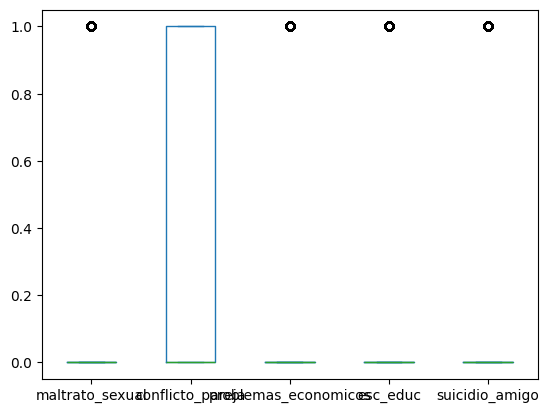

In [9]:
#Descripción variables numérica
data.plot(kind='box')

<Axes: xlabel='poblacion_diferencial'>

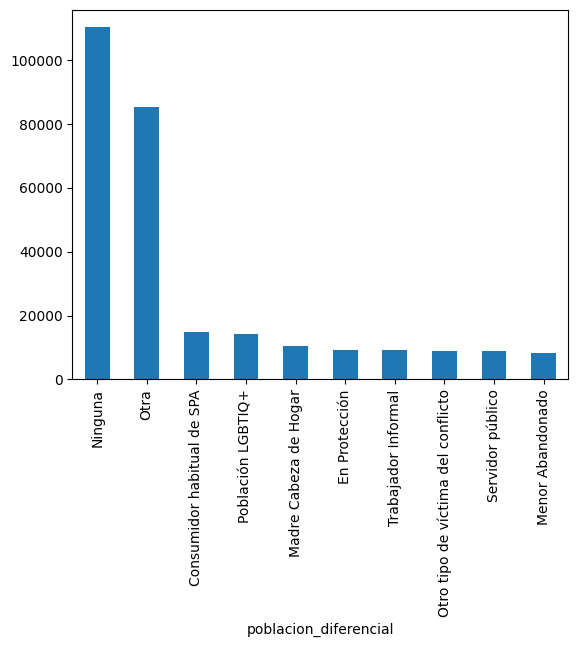

In [10]:
data['poblacion_diferencial'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

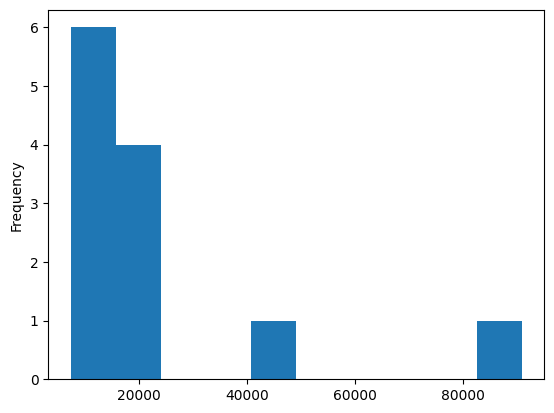

In [11]:
data['niveleducativo'].value_counts().plot(kind='hist')

<Axes: ylabel='count'>

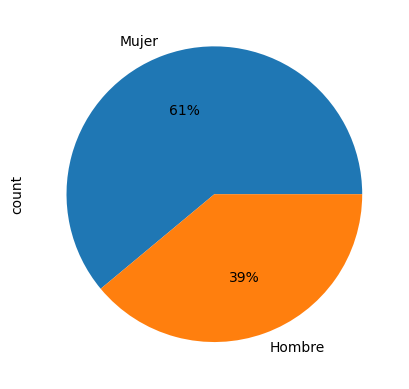

In [12]:
data['sexo'].value_counts().plot(kind='pie', autopct='%.0f%%')

<Axes: xlabel='clasificaciondelaconducta'>

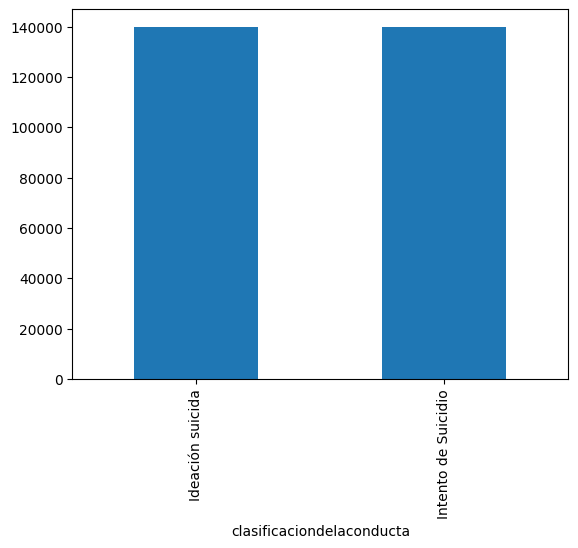

In [13]:
data['clasificaciondelaconducta'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

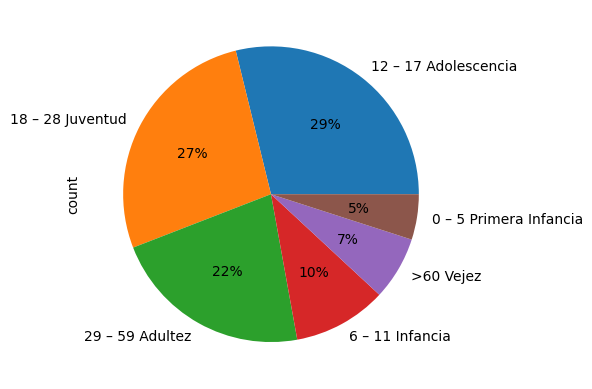

In [14]:
data['ciclovital'].value_counts().plot(kind='pie', autopct='%.0f%%')

In [15]:
#Sklearn sólo analiza variables numéricas
#Dummies para variable con más de 2 categorías
data = pd.get_dummies(data, columns=['localidad_residencia', 'ciclovital', 'niveleducativo', 'poblacion_diferencial'], drop_first=False, dtype=int)

#Dummies para variable con 2 categorías
data = pd.get_dummies(data, columns=['sexo'], drop_first=True, dtype=int)

data.head()

,maltrato_sexual,conflicto_pareja,problemas_economicos,esc_educ,suicidio_amigo,clasificaciondelaconducta,localidad_residencia_Antonio Nariño,localidad_residencia_Barrios Unidos,localidad_residencia_Bosa,localidad_residencia_Chapinero,...,poblacion_diferencial_En Protección,poblacion_diferencial_Madre Cabeza de Hogar,poblacion_diferencial_Menor Abandonado,poblacion_diferencial_Ninguna,poblacion_diferencial_Otra,poblacion_diferencial_Otro tipo de víctima del conflicto,poblacion_diferencial_Población LGBTIQ+,poblacion_diferencial_Servidor público,poblacion_diferencial_Trabajador Informal,sexo_Mujer
0,0,0,0,0,0,Intento de Suicidio,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,Intento de Suicidio,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,Intento de Suicidio,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,Ideación suicida,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,Intento de Suicidio,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [16]:
#Se codifican las categorias de la VARIABLE OBJETIVO

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["clasificaciondelaconducta"]=labelencoder.fit_transform(data["clasificaciondelaconducta"])

data.head()

,maltrato_sexual,conflicto_pareja,problemas_economicos,esc_educ,suicidio_amigo,clasificaciondelaconducta,localidad_residencia_Antonio Nariño,localidad_residencia_Barrios Unidos,localidad_residencia_Bosa,localidad_residencia_Chapinero,...,poblacion_diferencial_En Protección,poblacion_diferencial_Madre Cabeza de Hogar,poblacion_diferencial_Menor Abandonado,poblacion_diferencial_Ninguna,poblacion_diferencial_Otra,poblacion_diferencial_Otro tipo de víctima del conflicto,poblacion_diferencial_Población LGBTIQ+,poblacion_diferencial_Servidor público,poblacion_diferencial_Trabajador Informal,sexo_Mujer
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


# **2. Division 70-30**

<Axes: xlabel='clasificaciondelaconducta'>

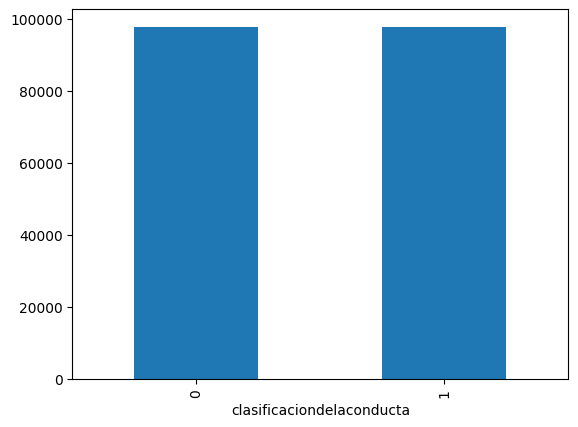

In [17]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("clasificaciondelaconducta", axis = 1) # Variables predictoras
Y = data['clasificaciondelaconducta'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')

# **3. Hiperparametrizacion con el 70%**

In [18]:
#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])

In [19]:
# Cambiamos a Random Forest
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros para Random Forest
criterion = ['entropy', 'gini']  # Índice de información
min_samples_leaf = [2, 10]  # Cantidad de registros por hoja
max_depth = [None, 10,]  # Niveles de profundidad
n_estimators = [50, 100]  # Número de árboles en el bosque
max_features = ['sqrt', 'log2']  # Número de características a considerar

In [20]:
# Hiperparametrización
from sklearn.model_selection import GridSearchCV

# Incluimos los nuevos parámetros específicos de Random Forest
param_grid = dict(
    criterion=criterion,
    min_samples_leaf=min_samples_leaf,
    max_depth=max_depth,
    n_estimators=n_estimators,
    max_features=max_features
)

grid = GridSearchCV(estimator=modelRF, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=3)
grid.fit(X_train, Y_train)

# Mejor modelo
modelRF = grid.best_estimator_

# Guardamos el puntaje
medidas['RandomForest'] = grid.best_score_

# Mejores parámetros
print("Mejores parámetros para Random Forest:")
print(grid.best_params_)
print(medidas)

Mejores parámetros para Random Forest:
{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 100}
             RandomForest
f1 de la CV      0.757704


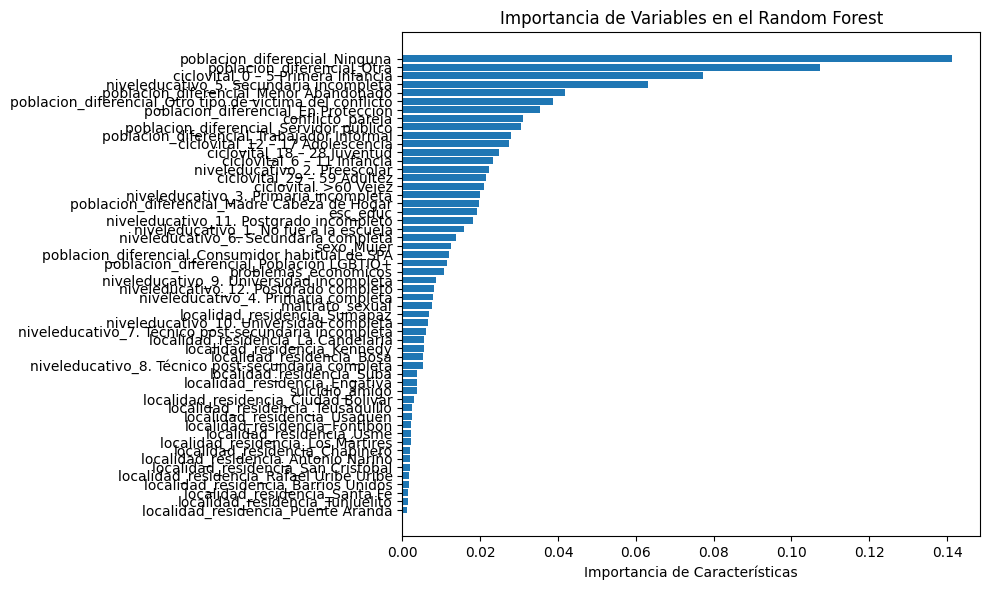

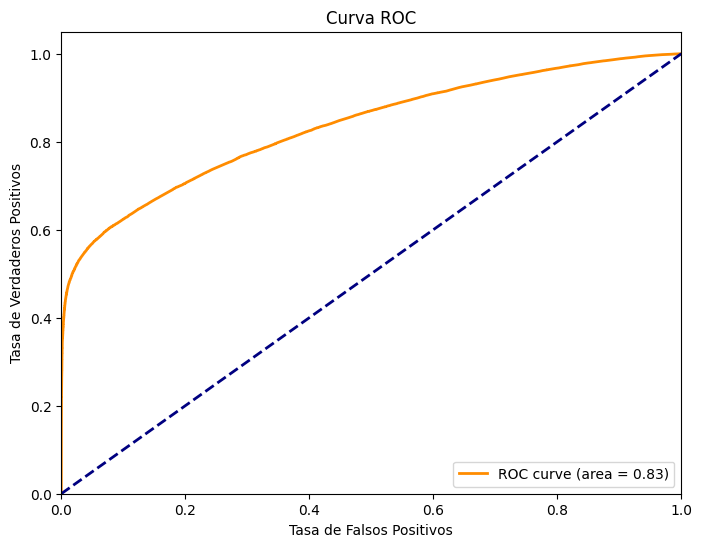

In [21]:
# Importancia de características
plt.figure(figsize=(10, 6))
feature_importance = modelRF.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Importancia de Características')
plt.title('Importancia de Variables en el Random Forest')
plt.tight_layout()
plt.show()

# Curva ROC para problemas binarios (opcional)
from sklearn.metrics import roc_curve, auc
if len(labelencoder.classes_) == 2:  # Solo para clasificación binaria
    y_pred_proba = modelRF.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

# **4. EVALUACION DE LOS MEJORES MODELOS CON EL 30%**

                     precision    recall  f1-score   support

   Ideación suicida       0.71      0.89      0.79     41945
Intento de Suicidio       0.85      0.64      0.73     41946

           accuracy                           0.76     83891
          macro avg       0.78      0.76      0.76     83891
       weighted avg       0.78      0.76      0.76     83891



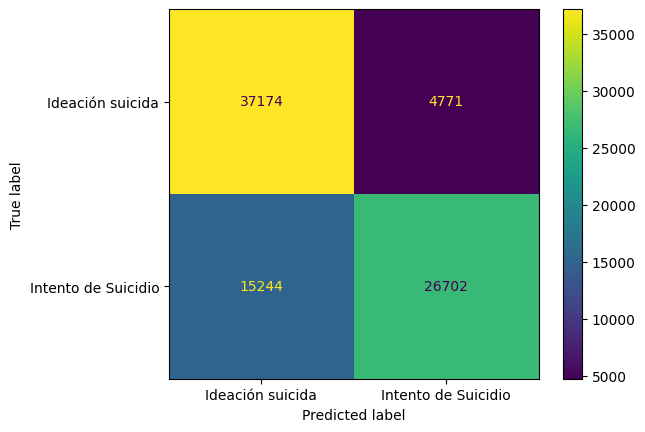

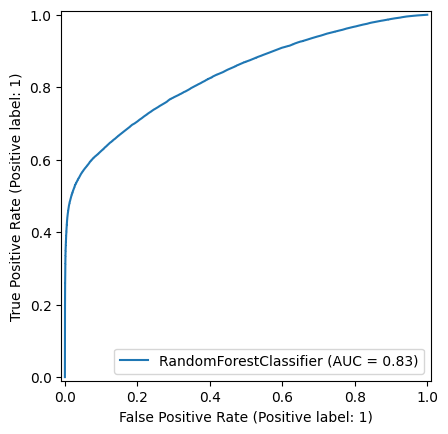

In [26]:
#Evaluación del mejor Tree con el 30% (X_test sin normalizar)
from sklearn import metrics

Y_pred = modelRF.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

# Curva ROC
metrics.RocCurveDisplay.from_estimator(modelRF,X_test, Y_test)

In [27]:
import pickle
filename = 'modelo-RF-hiper.pkl'
variables= X.columns._values
pickle.dump([modelRF,labelencoder,variables], open(filename, 'wb')) #write